In [2]:
import glob
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
vCurrent = 'v2016.03.02'
PATH_ICEWS = '/home/sudo777/ICEWS/data/{}/'.format(vCurrent)
print(PATH_ICEWS)
icews_files = glob.glob(PATH_ICEWS + 'events.20[0-9][0-9].csv')
print(icews_files)
frameList = []
for icewsFile in icews_files:
    currDataFrame = pd.read_csv(icewsFile, sep='\t', quoting=3, index_col=0, parse_dates= [1], lineterminator='\n')
    frameList.append(currDataFrame)
    
ICEWS = pd.concat(frameList)

/home/sudo777/ICEWS/data/v2016.03.02/
['/home/sudo777/ICEWS/data/v2016.03.02/events.2000.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2001.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2002.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2003.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2004.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2005.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2006.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2007.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2008.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2009.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2010.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2011.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2012.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2013.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2014.csv', '/home/sudo777/ICEWS/data/v2016.03.02/events.2015.csv']


/home/sudo777/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/sudo777/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
categories_from_data = set(ICEWS['Event Text'])
categories_from_data = [c.lower().replace(",",'') for c in categories_from_data]

In [4]:
icews_cameo_categories = {
14: "PROTEST", 
140: "Engage in civilian protest", 
141: "Demonstrate or rally",
1411: "Demonstrate or rally for leadership change",
1412: "Demonstrate or rally for policy change",
1413: "Demonstrate or rally for rights",
1414: "Demonstrate for change in institutions, regime",
142: "Conduct hunger strike",
1421: "Conduct hunger strike for leadership change",
1422: "Conduct hunger strike for policy change",
1423: "Conduct hunger strike for rights",
1424: "Hunger strike change in institutions, regime",
143: "Conduct strike or boycott",
1431: "Strike or boycott for leadership change",
1432: "Strike or boycott for policy change",
1433: "Strike or boycott for rights",
1434: "Strike or boycott for change in institutions, regime",
144: "Obstruct passage or block", 
1441: "Obstruct passage for leadership change",
1442: "Obstruct passage for policy change",
1443: "Obstruct passage for rights",
1444: "Obstruct passage for change in institutions, regime",
145: "Engage in violent protest, riot",
1451: "Violently protest for leadership change",
1452: "Violently protest for policy change",
1453: "Violently protest for rights",
1454: "Violently protest for change in institutions, regime",
"01": "MAKE PUBLIC STATEMENT",
"010": "Make statement",
"011": "Decline comment",
"012": "Make pessimistic comment",
"013": "Make optimistic comment",
"014": "Consider policy option",
"015": "Acknowledge or claim responsibility",
"016": "Reject accusation, deny responsibility", 
"017": "Engage in symbolic act",
"018": "Make empathetic comment",
"019": "Express accord",
"020": "Appeal", 
"021": "Appeal for material cooperation",
"0211": "Appeal for economic cooperation", 
"0212": "Appeal for military cooperation",
"0213": "Appeal for judicial cooperation", 
"0214": "Appeal for intelligence cooperation", 
"0215": "Appeal for military cooperation",
"022": "Appeal for diplomatic cooperation or policy support", 
"023": "Appeal for material aid",
"0231": "Appeal for economic aid",
"0232": "Appeal for military aid",
"0233": "Appeal for humanitarian aid",
"0234": "Appeal for military protection or peacekeeping",
"024": "Appeal for political reform",
"0241": "Appeal for leadership change",
"0242": "Appeal for policy change",
"0243": "Appeal for rights",
"0244": "Appeal for change in institutions, regime", 
"025": "Appeal to yield",
"0251": "Appeal for easing of administrative sanctions", 
"0252": "Appeal for easing of political dissent",
"0253": "Appeal for release of persons or property",
"0254": "Appeal for easing of economic sanctions, boycott", 
"0255": "Appeal for international involvement (not mediat.)", 
"0256": "Appeal for target to deescalate military engage",
"026": "Appeal to others to meet or negotiate",
"027": "Appeal to others to settle dispute",
"028": "Appeal to others to engage in or accept mediation",
"030": "Express intent to cooperate",
"031": "Express intent to engage in material cooperation",
"0311": "Express intent to cooperate economically",
"0312": "Express intent to cooperate militarily",
"0313": "Express intent to cooperate judicially",
"0314": "Express intent to cooperate on intelligence",
"032": "Express intent to engage in diplomatic cooperation such as policy support",
"033": "Express intent to provide material aid",
"0331": "Express intent to provide economic aid",
"0332": "Express intent to provide military aid",
"0333": "Express intent to provide humanitarian aid",
"0334": "Express intent to provide military protection or peacekeeping",
"034": "Express intent to institute political reform",
"0341": "Express intent to change leadership",
"0342": "Express intent to change policy",
"0343": "Express intent to provide rights",
"0344": "Express intent to change institutions, regime",
"035": "Express intent to yield",
"0351": "Express intent to ease administrative sanctions",
"0352": "Express intent to ease popular dissent",
"0353": "Express intent to release of persons or property",
"0354": "Express intent to ease economic sanctions, boycott",
"0355": "Express intent to allow international involvement (not mediat.)",
"0356": "Express intent to deescalate military engagement",
"036": "Express intent to meet or negotiate",
"037": "Express intent to settle dispute",
"038": "Express intent to accept mediation",
"039": "Express intent to mediate",
"040": "Consult",
"041": "Discuss by telephone",
"042": "Make a visit",
"043": "Host a visit",
"044": "Meet at a 'third' location",
"045": "Engage in mediation",
"046": "Engage in negotiation",
"050": "Engage in diplomatic cooperation",
"051": "Praise or endorse",
"052": "Defend verbally",
"053": "Rally support on behalf of",
"054": "Grant diplomatic recognition",
"055": "Apologize",
"056": "Forgive",
"057": "Sign formal agreement",
"060": "Engage in material cooperation",
"061": "Cooperate economically",
"062": "Cooperate militarily",
"063": "Engage in judicial cooperation",
"064": "Share intelligence or information",
"070": "Provide aid",
"071": "Provide economic aid",
"072": "Provide military aid",
"073": "Provide humanitarian aid",
"074": "Provide military protection or peacekeeping",
"075": "Grant asylum",
"080": "Yield",
"081": "Ease administrative sanctions",
"0811": "Ease restrictions on political freedoms",
"0812": "Ease ban on parties or politicians",
"0813": "Ease curfew",
"0814": "Ease state of emergency or curfew",
"082": "Ease political dissent",
"083": "Accede to requests or demands for political reform",
"0831": "Accede to demands to change leadership",
"0832": "Accede to demands to change policy",
"0833": "Accede to demands to provide rights",
"0834": "Accede to demands to change institutions, regime",
"084": "Return, release",
"0841": "Return, release persons",
"0842": "Return, release property",
"085": "Ease economic sanctions, boycott or embargo",
"086": "Allow international involvement",
"0861": "Receive deployment of peacekeepers",
"0862": "Receive inspectors",
"0863": "Allow for humanitarian access",
"087": "De-escalate military engagement",
"0871": "Declare truce, ceasefire",
"0872": "Ease military blockade",
"0873": "Demobilize armed forces",
"0874": "Retreat or surrender militarily",
"090": "Investigate ",
"091": "Investigate crime, corruption",
"092": "Investigate human rights abuses",
"093": "Investigate military action",
"094": "Investigate war crimes",
"100": "Demand",
"101": "Demand material cooperation",
"1011": "Demand economic cooperation",
"1012": "Demand military cooperation",
"1013": "Demand judicial cooperation",
"1014": "Demand intelligence cooperation",
"1015": "Demand military cooperation",
"102": "Demand diplomatic cooperation such as policy support",
"103": "Demand material aid",
"1031": "Demand economic aid",
"1032": "Demand military aid",
"1033": "Demand humanitarian aid",
"1034": "Demand military protection or peacekeeping",
"104": "Demand political reform",
"1041": "Demand leadership change",
"1042": "Demand policy change",
"1043": "Demand rights",
"1044": "Demand change in institutions, regime",
"105": "Demand target yield",
"1051": "Demand easing of administrative sanctions",
"1052": "Demand easing of political dissent",
"1053": "Demand release of persons or property",
"1054": "Demand easing of economic sanctions, boycott",
"1055": "Demand international involvement (not mediat.)",
"1056": "Demand de-escalation of military engage",
"106": "Demand meeting, negotiation",
"107": "Demand settling of dispute",
"108": "Demand meditation",
"110": "Disapprove",
"111": "Criticize or denounce",
"112": "Accuse",
"1121": "Accuse of crime, corruption",
"1122": "Accuse of human rights abuses",
"1123": "Accuse of aggression",
"1124": "Accuse of war crimes",
"1125": "Accuse of espionage, treason",
"113": "Rally opposition against",
"114": "Complain officially",
"115": "Bring lawsuit against",
"116": "Find legally guilty or liable",
"120": "Reject",
"121": "Reject material cooperation",
"1211": "Reject economic cooperation",
"1212": "Reject military cooperation",
"1213": "Reject judicial cooperation",
"1214": "Reject intelligence cooperation",
"1215": "Reject military cooperation",
"122": "Reject request for material aid",
"1221": "Reject request for economic aid",
"1222": "Reject request for military aid",
"1223": "Reject request for humanitarian aid",
"1224": "Reject request for military protection, peacekeeping",
"123": "Reject demand for political reform",
"1231": "Reject request for leadership change",
"1232": "Reject request for policy change",
"1233": "Reject request for rights",
"1234": "Reject request for change in institutions, regime",
"124": "Refuse to yield",
"1241": "Refuse to ease administrative sanctions",
"1242": "Refuse ease popular dissent",
"1243": "Refuse to release of persons or property",
"1244": "Refuse to ease economic sanctions, boycott",
"1245": "Refuse to allow international involvement (not mediation)",
"1246": "Refuse to de-escalate military engagement",
"125": "Reject proposal to meet, discuss, negotiate",
"126": "Reject mediation",
"127": "Reject plan, agreement to settle dispute",
"128": "Defy norms, law",
"129": "Veto",
"130": "Threaten",
"131": "Threaten non-force",
"1311": "Threaten to reduce or stop aid",
"1312": "Threaten to boycott, embargo, or sanction",
"1313": "Threaten to reduce or break relations",
"132": "Threaten with administrative sanctions",
"1321": "Threaten with restrictions on political freedoms",
"1322": "Threaten to ban political parties or politicians",
"1323": "Threaten to impose curfew",
"1324": "Threat to impose state of emergency or martial law",
"133": "Threaten political dissent",
"134": "Threaten to halt negotiations",
"135": "Threaten to halt mediation",
"136": "Threaten to halt international involvement (not medit.)",
"137": "Threat with repression",
"138": "Threaten force",
"1381": "Threaten blockade",
"1382": "Threaten occupation",
"1383": "Threaten unconventional violence",
"1384": "Threaten conventional attack",
"1385": "Threaten attack with WMD",
"137": "Give ultimatum",
"15": "EXHIBIT MILITARY POSTURE",
"150": "Exhibit military or police power",
"151": "Increase police alert status",
"152": "Increase military alert status",
"153": "Mobilize or increase police power",
"154": "Mobilize or increase armed forces",
"155": "Mobilize or increase cyber-forces",
"160": "Reduce relations",
"161": "Reduce or break diplomatic relations",
"162": "Reduce or stop material aid",
"1621": "Reduce or stop economic assistance",
"1622": "Reduce or stop military assistance",
"1623": "Reduce or stop humanitarian assistance",
"163": "Impose embargo, boycott or sanctions",
"164": "Halt negotiations",
"165": "Halt mediation",
"166": "Expel or withdraw",
"1661": "Expel or withdraw peacekeepers",
"1662": "Expel or withdraw inspectors, observers",
"1663": "Expel or withdraw aid agencies",
"170": "Coerce",
"171": "Seize or damage property",
"1711": "Confiscate property",
"1712": "Destroy property",
"172": "Impose administrative sanctions",
"1721": "Impose restrictions on political freedoms",
"1722": "Ban political parties or politicians",
"1723": "Impose curfew",
"1724": "Impose state of emergency or martial law",
"173": "Arrest, detain",
"174": "Expel or deport individuals",
"175": "Attack cybernetically",
"18": "ASSAULT",
"180": "Use unconventional violence",
"181": "Abduct, hijack, take hostage",
"182": "Physically assault",
"1821": "Sexually assault",
"1822": "Torture",
"1823": "Kill by physical assault",
"183": "Conduct suicide, car, or other non-military bombing",
"1831": "Carry out suicide bombing",
"1832": "Carry out vehicular bombing",
"1833": "Carry out roadside bombing (IED)",
"184": "Use as human shield",
"185": "Attempt to assassinate",
"186": "Assassinate",
"19": "FIGHT",
"190": "Use conventional military force",
"191": "Impose blockade, restrict movement",
"192": "Occupy territory",
"193": "Fight with small arms and light weapons",
"194": "Fight with artillery and tanks",
"195": "Employ aerial weapons",
"1951": "Employ precision-guided aerial munitions",
"1952": "Employ remotely piloted aerial munitions",
"196": "Violate ceasefire",
"200": "Engage in unconventional mass violence",
"201": "Engage in mass expulsion",
"202": "Engage in mass killings",
"203": "Engage in ethnic cleansing",
"204": "Use weapons of mass destruction",
"2041": "Use chemical, biological, or radiological weapons",
"2042": "Detonate nuclear weapons"

}

In [5]:
icews_cameo_categories = {v.lower().strip().replace(',',''): str(k) for k, v in icews_cameo_categories.items()}
print("total CAMEO categories {}".format(len(icews_cameo_categories)))

mapped_categories = {
"engage in civilian protest":140,
"demonstrate or rally":141,
"present demonstrate or rally":141,
"demonstrate for leadership change":1411,
"demonstrate or rally for leadership change":1411,
"demonstrate for policy change":1412,
"demonstrate or rally for policy change":1412,
"demonstrate for rights":1413,
"demonstrate or rally for rights":1413,
"demonstrate for change in institutions regime":1414,
"conduct hunger strike":142,
"present conduct hunger strike":142,
"conduct hunger strike for leadership change":1421,
"conduct hunger strike for policy change":1422,
"conduct hunger strike for rights":1423,
"hunger strike change in institutions regime":1424,
"conduct strike or boycott":143,
"present conduct strike or boycott":143,
"conduct strike or boycott for leadership change":1431, 
"strike or boycott for leadership change":1431,
"conduct strike or boycott for policy change":1432,
"strike or boycott for policy change":1432,
"strike or boycott for rights":1433,
"strike or boycott for change in institutions regime":1434,
"obstruct passage block":144,
"obstruct passage or block":144,
"obstruct passage to demand leadership change":1441,
"obstruct passage for leadership change":1441,
"obstruct passage to demand policy change":1442,
"obstruct passage for policy change":1442,
"obstruct passage for rights":1443,
"obstruct passage to demand change in institutions, regime":1444,
"obstruct passage for change in institutions regime":1444,
"protest violently riot":145,
"engage in violent protest riot":145,
"engage in violent protest for leadership change":1451,
"violently protest for leadership change":1451,
"engage in violent protest for policy change":1452,
"violently protest for rights":1453,
"violently protest for policy change":1452,
"engage in violent protest for change in institutions regime":1454,
"violently protest for change in institutions regime":1454,
"appeal for intelligence cooperation":"0214",
"appeal for intelligence":"0214",
"appeal for intelligence cooperation":"0214",
"appeal for intelligence":"0214",
"reject accusation deny responsibility":"016",
"deny responsibility":"016",
"appeal for international involvement (not mediat.)":"0255",
"appeal for target to allow international involvement (non-mediation)":"0255",
"appeal to others to engage in or accept mediation":"028",
"appeal to engage in or accept mediation":"028",
"appeal for diplomatic cooperation (such as policy support)":"022",
"appeal for diplomatic cooperation or policy support":"022",
"appeal for change in leadership":"0241",
"appeal for leadership change":"0241",
"appeal for de-escalation of military engagement":"0256",
"appeal for target to deescalate military engage":"0256",
"appeal for easing of economic sanctions boycott or embargo":"0254",
"appeal for easing of economic sanctions boycott":"0254",
"appeal for aid":"023",
"appeal for material aid":"023",
"protest":"14",
"appeal for easing of political dissent":"0252",
"appeal": "020",
"make an appeal or request": "020",
"make public statement":"01",
"express intent to engage in diplomatic cooperation (such as policy support)": "032",
"express intent to engage in diplomatic cooperation such as policy support": "032",
"express intent to de-escalate military engagement": "0356",
"express intent to deescalate military engagement": "0356",
"express intent to cooperate on judicial matters": "0313",
"express intent to cooperate judicially": "0313",
"express intent to release persons or property": "0353",
"express intent to release of persons or property": "0353",
"express intent to allow international involvement (non-mediation)": "0355",
"express intent to allow international involvement (not mediat.)": "0355",
"express intent to change policy": "0342",
"express intent to ease economic sanctions boycott": "0354",
"express intent to ease popular dissent": "0352",
"engage in mediation": "045",
"mediate": "045",
"accede to demands for change in policy":"0832",
"accede to demands to change policy":"0832",
"accede to demands for change in leadership":"0831",
"accede to demands to change leadership":"0831",
"allow humanitarian access":"0863",
"allow for humanitarian access":"0863",
"accede to demands for rights":"0833",
"accede to demands to provide rights":"0833",
"return release person(s)":"0841",
"return release persons":"0841",
"accede to demands for change in institutions regime":"0834",
"accede to demands to change institutions regime":"0834",
"ease ban on political parties or politicians":"0812",
"ease ban on parties or politicians":"0812",
"ease curfew":"0814",
"ease state of emergency or curfew":"0814",
"ease economic sanctions boycott embargo":"085",
"ease economic sanctions boycott or embargo":"085",
"reject request for material aid":"122",
"reject request or demand for material aid":"122",
"refuse to release of persons or property":"1243",
"refuse to release persons or property":"1243",
"refuse to allow international involvement (not mediation)":"1245",
"refuse to allow international involvement (non mediation)":"1245",
"refuse to ease economic sanctions boycott":"1244",
"refuse to ease economic sanctions boycott or embargo":"1244",
"reject request for military protection peacekeeping":"1224",
"reject request for military protection or peacekeeping":"1224",
"reject proposal to meet discuss negotiate":"125",
"reject proposal to meet discuss or negotiate":"125",
"reject request for leadership change":"1231",
"reject request for change in leadership":"1231",
"reject demand for political reform":"123",
"reject request or demand for political reform":"123",
"find legally guilty or liable":"116",
"find guilty or liable (legally)":"116",
"demand international involvement (not mediat.)":"1055",
"demand that target allows international involvement (non-mediation)":"1055",
"demand de-escalation of military engage":"1056",
"demand de-escalation of military engagement":"1056",
"demand easing of economic sanctions boycott":"1054",
"demand easing of economic sanctions boycott or embargo":"1054",
"demand diplomatic cooperation such as policy support":"102",
"demand diplomatic cooperation (such as policy support)":"102",
"demand leadership change":"1041",
"demand change in leadership":"1041",
"demand that target yields":"105",
"demand target yield": "105",
"demand mediation": "108",
"demand material aid": "103", 
"demand military aid": "1032",
"demand economic cooperation": "1011",
"demand easing of political dissent": "1052",
"disapprove": "110",
"reject intelligence cooperation": "1214",
"refuse ease popular dissent": "1242",
"threaten with military force": "1384",
"threaten with repression": "137",
"ease state of emergency or martial law": "0814",
"carry out vehicular bombing": "1832",
"carry out car bombing" : "1832",
"abduct hijack take hostage": "181",
"abduct hijack or take hostage" : "181",
"arrest detain": "173",
"arrest detain or charge with legal action" : "173",
"carry out roadside bombing (ied)" :"1833",
"carry out roadside bombing": "1833",
"exhibit military or police power": "150",
"demonstrate military or police power" : "150",
"threaten to boycott embargo or sanction": "1312",
"threaten with sanctions boycott embargo": "1312",
"threaten political dissent" : "133",
"threaten with political dissent protest": "133",
"threaten to impose state of emergency or martial law": "1324",
"threat to impose state of emergency or martial law": "1324",
"threaten to halt international involvement (non-mediation)": "136",
"threaten to halt international involvement (not medit.)": "136",
"exhibit military posture": "15",
"threaten conventional attack": "1384",
"threaten blockade": "1381",
"employ precision-guided aerial munitions": "1951",
"threaten attack with wmd": "1385",
"attack cybernetically": "175",
"threaten force": "138",
"fight": "19",
"expel or withdraw inspectors observers": "1662",
"engage in unconventional mass violence": "200",
"expel or withdraw aid agencies": "1663",
"mobilize or increase cyber-forces": "155",
"threaten unconventional violence": "1383",
"threaten occupation": "1382",
"assault": "18",
"employ remotely piloted aerial munitions": "1952",
"engage in political dissent": "140",
"refuse to ease popular dissent": "1242",
"use tactics of violent repression": "175",
"express intent to ease economic sanctions boycott or embargo": "0354",
"engage in violent protest for rights": "1453"
}
print("mapped categories {}".format(len(mapped_categories)))


total CAMEO categories 300
mapped categories 178


In [6]:
for k, v in icews_cameo_categories.items():
    if k in mapped_categories:
        continue
    if k in set(categories_from_data):
        pass #print "present", k, "[",v, "]"
    else:
        print("not present ==> {} [{}]".format(k,v))
        
all_categories = {}
all_categories.update(icews_cameo_categories)
print("updating with cameo categories {}".format(len(all_categories)))
all_categories.update(mapped_categories)
print("updating with mapped categories {}".format(len(all_categories)))        


print("This should be 0. If not, add code to list above.")
print("# of mismatches: {}".format(len(set(categories_from_data) - set(all_categories.keys()))))


not present ==> return release [084]
not present ==> allow international involvement [086]
not present ==> de-escalate military engagement [087]
not present ==> demand meditation [108]
updating with cameo categories 300
updating with mapped categories 373
This should be 0. If not, add code to list above.
# of mismatches: 0


In [7]:
for idx, item in ICEWS.head(5).iterrows():
    print(item['Event Sentence'])

Turkey collaborated with the United States to restrain Saddam Hussein through sanctions and a no-fly zone in the 1990s, and it has stood with the United States in the war against terrorism. 
ANKARA (A.A) - 01.10.2003 - U.S. Ambassador in Ankara Eric Edelman said on Wednesday that Turkey and the United States were expected to reach a common concept for solution after the talks which was started for elimination of terrorist PKK-KADEK organization from north of Iraq between the two countries. 
The sources said that police found 286 kilograms of heroin hidden in the truck and detained the driver of the truck. 
ANKARA (A.A) - 01.10.2003 - President Ahmet Necdet Sezer said on Wednesday that efforts of the Parliament and the government for European Union (EU) full membership deserved eulogy, and expressed belief that reforms would continue in the next period. 
Sezer said supreme Parliament, which founded Turkish Republic, was the backbone of democratic parliamentarian system, stating that, 'P

In [ ]:
ICEWS['CAMEO Code'] = pd.Series([all_categories[x.lower().replace(",",'')] for x in ICEWS['Event Text']], index = ICEWS.index)

In [ ]:
protest_event_codes = [140, 141, 1411, 1412, 1413, 1414, 142, 1421, 1422, 1423, 1424, 143, 1431, 1432, 1433, 1434,144, 1441, 1442, 1443, 1444]
ICEWS_protest = ICEWS[ICEWS['CAMEO Code'].isin(protest_event_codes)]
ICEWS_protest.head(5)

In [13]:
sentences = []
for idx, item in ICEWS_protest.iterrows():
    if len(word_tokenize(item['Event Sentence'])) <= 30:
        sentences.append(item['Event Sentence'])

In [12]:
from nltk import word_tokenize

In [14]:
# Select sentence with less than 30 tokens for training
len(sentences)

166071

In [77]:
train_sentences = sentences[0:166000]
test_sentences = sentences[166000:]

In [78]:
with open('train.txt', 'w') as fp:
    for sentence in train_sentences:
        fp.write(sentence+'\n')

In [79]:
with open('test.txt', 'w') as fp:
    for sentence in test_sentences:
        fp.write(sentence+'\n')

In [15]:
ICEWS_protest.dtypes

Event Date         datetime64[ns]
Source Name                object
Source Sectors             object
Source Country             object
Event Text                 object
Intensity                 float64
Target Name                object
Target Sectors             object
Target Country             object
Story ID                    int64
Sentence Number             int64
Event Sentence             object
Publisher                  object
Source                     object
Headline                   object
City                       object
District                   object
Province                   object
Country                    object
Latitude                  float64
Longitude                 float64
productID                  object
holdingID                 float64
CAMEO Code                 object
dtype: object

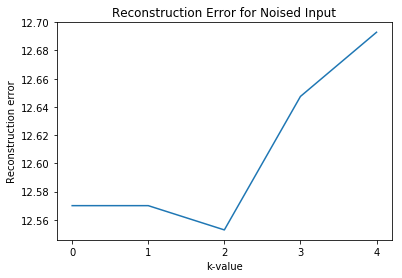

In [10]:
k = [0, 1, 2, 3, 4]
error = [ 12.5700, 12.5700,  12.5528,  12.6474,  12.6929]
plt.plot([0, 1,2,3,4], error)
plt.xticks([0,1,2,3,4])
plt.xlabel('k-value')
plt.ylabel('Reconstruction error')
plt.title('Reconstruction Error for Noised Input')
plt.show()

In [1]:
sentence1 = 'Students raised full-throated slogans against the government.'
sentence2 = 'Students full-throated raised slogans against the government.'
sentence3 = 'Students raised slogans full-throated against the government.'
sentence4 = 'Students slogans full-throated raised the against government.'
edit_distance = [1, 2, 3]
cosine_similarity = [0.99668634, 0.99549246, 0.97257733]

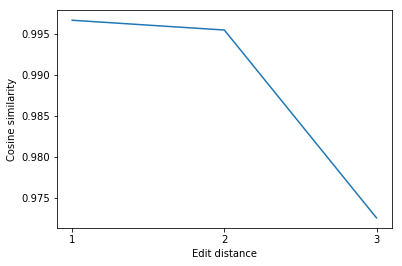

In [5]:
plt.plot(edit_distance, cosine_similarity)
plt.xticks([1,2,3])
plt.xlabel('Edit distance')
plt.ylabel('Cosine similarity')
plt.show()

In [5]:
G_loss = [0.00266834, -0.00100926, 0.00079178, -0.00246522, -0.00031174,
          -0.00015647, -0.00014641, -0.00000649,  -0.00001857, 0.00033250,
          0.00112063, 0.00031532, 0.00073041, -0.00015151, 0.00079593, 0.00006116, 0.00027953, -0.00000794, 
        ]
epochs = range(1, 19)

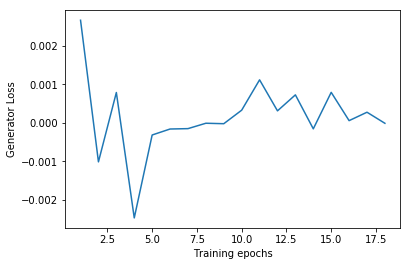

In [6]:
plt.plot(epochs, G_loss)
plt.xlabel('Training epochs')
plt.ylabel('Generator Loss')
plt.show()